In [1]:
## 相关包
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
# https://blog.csdn.net/mengjizhiyou/article/details/124647597
import numpy as np
import random
import numpy as np

import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
# import importlib
# import multi.process 
# importlib.reload(multi.process)
from multi.nsga import *
from multi.process import *

d:\SoftWare\Anaconda\Anaconda\envs\pytorch\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# generate dataset

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 创建列名列表（修正了缺少逗号的问题）
columns = ['current_date', 'y_value', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5']

# 生成1000行数据
data = {
    # 日期列：从今天开始往前1000天的日期序列
    'current_date': [datetime.today() - timedelta(days=i) for i in range(100)],
    
    # y_value：0-100之间的随机整数（模拟目标变量）
    'y_value': np.random.randint(0, 101, size=100),
    
    # 特征列：0-1之间的随机浮点数（保留4位小数）
    'feature_1': np.round(np.random.rand(100), 4),
    'feature_2': np.round(np.random.rand(100), 4),
    'feature_3': np.round(np.random.rand(100), 4),
    'feature_4': np.round(np.random.rand(100), 4),
    'feature_5': np.round(np.random.rand(100), 4)
}

# 创建DataFrame
df = pd.DataFrame(data)

# 查看前5行示例
print(df.head())

                current_date  y_value  feature_1  feature_2  feature_3  \
0 2025-08-09 23:33:22.816267       80     0.8470     0.6916     0.9551   
1 2025-08-08 23:33:22.816267       46     0.5546     0.7202     0.2840   
2 2025-08-07 23:33:22.816267       19     0.1562     0.1290     0.3365   
3 2025-08-06 23:33:22.816267       11     0.8014     0.2570     0.7388   
4 2025-08-05 23:33:22.816267       12     0.8629     0.0627     0.4713   

   feature_4  feature_5  
0     0.4833     0.0704  
1     0.9326     0.5083  
2     0.2824     0.5854  
3     0.0007     0.7088  
4     0.6242     0.1808  


In [3]:
excel_name = [ 'current_date','y_value' 'feature_1','feature_2', 'feature_3', 'feature_4','feature_5']
from sklearn.preprocessing import MinMaxScaler
time_df = df

In [4]:
lag_tm = 3
X,y = process_data(time_df,lag_tm,'y_value')

total_rows  = len(X)
split_index_1 = int(total_rows * 0.6)
split_index_2 = int(total_rows * 0.8)
# 划分训练集、验证集和测试集
start_col = lag_tm + 1
X_train_a = X.iloc[:split_index_1, start_col :].values
y_train_a = y.iloc[:split_index_1, 1:].values

X_val_a = X.iloc[split_index_1:split_index_2, start_col :].values
y_val_a = y.iloc[split_index_1:split_index_2, 1:].values

X_test_a = X.iloc[split_index_2:, start_col :].values
y_test_a = y.iloc[split_index_2:, 1:].values

# feature selection 

In [5]:
res = run_feature_selection_optimization(X_train_a, y_train_a)

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      3 |             - |             -
     2 |      200 |      3 |  0.0557341579 |             f
     3 |      300 |      4 |  0.3333333333 |         ideal


In [6]:

X_solution = res.X
F_solution = res.F
# Assuming X and F are NumPy arrays
X_solution_df = pd.DataFrame(X_solution, columns=[f'Variable_{i+1}' for i in range(X_train_a.shape[1])])
F_solution_df = pd.DataFrame(F_solution, columns=['Objective_1', 'Objective_2'])  # Adjust the column names based on your objectives


In [7]:
feature_df = X_solution_df


In [8]:
feature_names = X.columns
feature_count_df = analyze_feature_selection(res,feature_names)

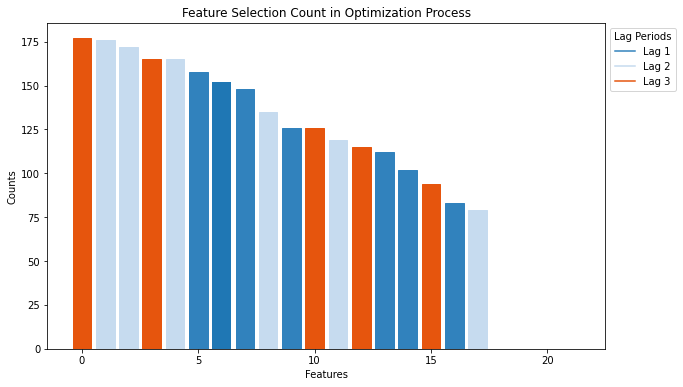

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 假设你有两个列表，一个包含特征名字，一个包含特征数量
feature_names = feature_count_df['Feature']   # 你的特征名字列表

feature_counts = feature_count_df['Count']  # 你的特征数量列表


# 设置图的大小，这里的 (10, 6) 是宽度和高度的尺寸
fig, ax = plt.subplots(figsize=(10, 6))
colors_1 =['#AD4641', '#75B0B4', '#806CAB', '#DED0A1', '#B4C4E5', '#D19692', '#AFC9A6', '#869C76', '#AFAFAD']
colors = plt.get_cmap('tab20c')
# 定义标签与颜色对应关系
label_dict = {'Lag 1': colors(0), 'Lag 2': colors(3), 'Lag 3': colors(4)}
# label_dict = {'Lag 1': colors(0), 'Lag 2': colors(1), 'Lag 3': colors(2)}
            #   'Lag 4': colors(3), 'Lag 5': colors(4)}
# 在每个 bar 上标注特征名字，并根据条件设置不同的颜色
for i, (bar, name) in enumerate(zip(ax.bar(range(len(feature_names)), feature_counts, align='center', label=''), feature_names)):
    height = bar.get_height()
    c = name.split('_')[-1]

    if c == '0':
        bar.set_color(label_dict['Lag 1'])  # 当特征名字包含 'Value' 时，设置为红色
    # ax.text(bar.get_x() + bar.get_width() / 2, height/2,name, ha='center', va='bottom', rotation=90)
    if c ==  '1':
        bar.set_color(label_dict['Lag 2'])  # 当特征名字包含 'Value' 时，设置为红色
    if c == '2':
        bar.set_color(label_dict['Lag 3'])
    if c == '3':
        bar.set_color(label_dict['Lag 4'])  # 当特征名字包含 'Value' 时，设置为红色
    # ax.text(bar.get_x() + bar.get_width() / 2, height/2,name, ha='center', va='bottom', rotation=90)
    if c ==  '4':
        bar.set_color(label_dict['Lag 5'])  # 当特征名字包含 'Value' 时，设置为红色

# 添加图例，将 bbox_to_anchor 参数设置为 (1.05, 1) 以将图例放在图表的右方
legend_labels = [plt.Line2D([0], [0], color=value, label=key) for key, value in label_dict.items()]
ax.legend(handles=legend_labels, title='Lag Periods', bbox_to_anchor=(1, 1), loc='upper left')
# 设置图表标题和标签
plt.title('Feature Selection Count in Optimization Process')
plt.xlabel('Features')
plt.ylabel('Counts')
plt.rcParams.update({
    'axes.titlesize': 15,    # 标题
    'axes.labelsize': 15,   # 坐标轴标签
    'xtick.labelsize': 13,   # X轴刻度
    'ytick.labelsize': 13,   # Y轴刻度
    'legend.fontsize': 13,   # 图例
    'legend.title_fontsize': 13,
})
plt.savefig('D:/prediciton/image1/Figure 4 Feature selection process (lag=3)_1.png', dpi=300, bbox_inches='tight')
# 显示图表
plt.show()


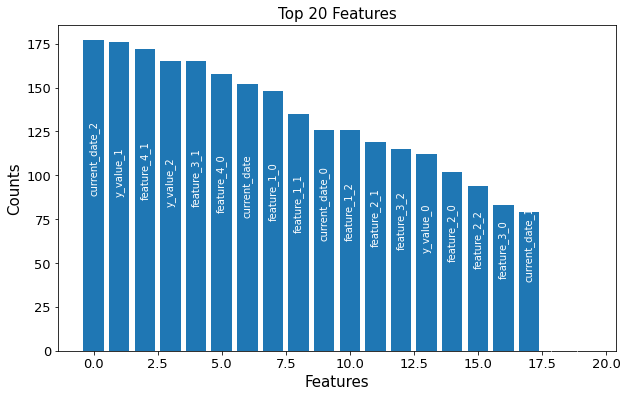

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 假设你有两个列表，一个包含特征名字，一个包含特征数量
feature_names = feature_count_df['Feature']  # 你的特征名字列表

feature_counts = feature_count_df['Count']   # 你的特征数量列表

# 将特征名字和数量组合成一个元组列表，然后按照数量进行降序排序
sorted_features = sorted(zip(feature_names, feature_counts), key=lambda x: x[1], reverse=True)

# 提取排名前十的特征名字和数量
top_features = sorted_features[:20]
top_feature_names, top_feature_counts = zip(*top_features)

# 设置图的大小，这里的 (10, 6) 是宽度和高度的尺寸
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(range(len(top_feature_names)), top_feature_counts, align='center')

# 在每个 bar 上标注特征名字
for bar, name in zip(bars, top_feature_names):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height/2,name, ha='center', va='bottom', rotation=90,color='white')

# 设置图表标题和标签
plt.title('Top 20 Features')
plt.xlabel('Features')
plt.ylabel('Counts')

# 显示图表
plt.show()


In [11]:
selected_features = decise_score(feature_df, X_train_a, X_val_a, y_train_a, y_val_a)

Metrics: rmse, mae, mape
30.823028728533476 27.925955678670363 131.58007499175957


In [58]:
'''
数据集的构建
'''

'\n数据集的构建\n'

# public opinion prediction

In [12]:
from multi.deep_func import *
from QDPlus.neural_pi.utils import Timer
from  QDPlus.neural_pi.estimator import PiEnsemble, Adam, ExponentialDecay, snm_aggreg
from multi.deep_func import qd_plus_objective

In [13]:
X_train_deep = X_train_a[:, selected_features]
y_train_deep = y_train_a
X_val_deep = X_val_a[:, selected_features]
y_val_deep = y_val_a
X_test_deep = X_test_a[:, selected_features]
y_test_deep = y_test_a

In [14]:
from sklearn.preprocessing import MinMaxScaler


scaler_X_train = MinMaxScaler(feature_range=(-1, 1))
scaler_y_train =MinMaxScaler(feature_range=(-1, 1))
# scaler_X = MinMaxScaler()
# scaler_X.fit(X_train) 
# scaler_y =  MinMaxScaler()
# scaler_y.fit(y_train)
X_train_deep_scaler = scaler_X_train.fit_transform(X_train_deep.astype(np.float32))
y_train_deep_scaler = scaler_y_train.fit_transform(y_train_deep.astype(np.float32))


scaler_X_val = MinMaxScaler(feature_range=(-1, 1))
scaler_y_val = MinMaxScaler(feature_range=(-1, 1))
X_val_deep_scaler = scaler_X_val.fit_transform(X_val_deep.astype(np.float32))
y_val_deep_scaler = scaler_y_val.fit_transform(y_val_deep.astype(np.float32))

scaler_X_test = MinMaxScaler(feature_range=(-1, 1))
scaler_y_test =MinMaxScaler(feature_range=(-1, 1))
X_test_deep_scaler = scaler_X_test.fit_transform(X_test_deep.astype(np.float32))
y_test_deep_scaler = scaler_y_test.fit_transform(y_test_deep.astype(np.float32))

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
# m_train, n_train = X_train_a.shape
timesteps = 1 # Choose the appropriate number of time steps
X_train_deep_tensor = torch.tensor(X_train_deep_scaler, dtype=torch.float32)
y_train_deep_tensor = torch.tensor(y_train_deep_scaler, dtype=torch.float32)
# m_val, n_val = X_val.shape
X_val_deep_tensor = torch.tensor(X_val_deep_scaler, dtype=torch.float32)
y_val_deep_tensor = torch.tensor(y_val_deep_scaler, dtype=torch.float32)
# m_test, n_test = X_test.shape
X_test_deep_tensor = torch.tensor(X_test_deep_scaler, dtype=torch.float32)
y_test_deep_tensor = torch.tensor(y_test_deep_scaler, dtype=torch.float32)

from torch.utils.data import TensorDataset, DataLoader

train_deep_dataset = TensorDataset(X_train_deep_tensor, y_train_deep_tensor)
train_deep_dataloader = DataLoader(train_deep_dataset, batch_size=32, shuffle=False)

val_deep_dataset = TensorDataset(X_val_deep_tensor, y_val_deep_tensor)
val_deep_dataloader = DataLoader(val_deep_dataset, batch_size=32, shuffle=False)

test_deep_dataset = TensorDataset(X_test_deep_tensor, y_test_deep_tensor)
test_deep_dataloader = DataLoader(test_deep_dataset, batch_size=32, shuffle=False)

## QD+

In [29]:
import random  
input_size = X_train_deep.shape[1]
hidden_size = 128
output_size = 3

timer = Timer().start()
lstmmodel_all =[]
for i in range(5):
    lstmmodel = LSTMQDPLUS(input_size, hidden_size,output_size, num_layers=3, dropout=0.0)
    method = PiEnsemble
    r_seed = random.randint(1, 1000)
    hyper_params=dict(
        ensemble_size=1,
        aggreg_func=snm_aggreg,
        hidden_size=128,
        epochs=100,
        batch_size=32,
        optimizer=Adam,
        learning_rate=0.001,
        scheduler=ExponentialDecay,
        decay_rate=1.,
        decay_steps=50.,
        early_stopping=True,
        patience=500,
        delta=1e-6,
        tolerance=0.01,
        loss_func=qd_plus_objective,
        alpha=0.05,  # gamma = 0.95
        soften=160.,
        lambda_1=0.95,
        lambda_2=0.3,
        ksi=10.,
        print_frequency=10,
        device='cpu',
        model = lstmmodel
    )
    run_dir = f'./model/{r_seed}'

    estimator = method(**hyper_params, seed=r_seed, output_dir=run_dir)
    estimator.fit(X_train_deep_scaler, y_train_deep_scaler, X_val_deep_scaler, y_val_deep_scaler)
    lstmmodel_all.append(estimator.ensemble[0])

32

─ Model 1 of 1 [seed=737784148]
ep:    0  train  picp 0.000000  mpiw -1.946068  cross 1.000000  mse 0.412768  pimse 0.392588  within 0.000000  loss 20.184669  epochs 100.000000  lr 0.001000
ep:    0  valid  picp 0.000000  mpiw -1.947017  cross 1.000000  mse 0.405127  pimse 0.392009  within 0.000000  loss 20.191874  epochs 100.000000  lr 0.001000
ep:   10  train  picp 0.948276  mpiw 2.229902  cross 0.000000  mse 0.388333  pimse 0.398176  within 1.000000  loss 0.194687  epochs 100.000000  lr 0.001000
ep:   10  valid  picp 0.947368  mpiw 2.177162  cross 0.000000  mse 0.386032  pimse 0.400558  within 1.000000  loss 0.192454  epochs 100.000000  lr 0.001000
ep:   20  train  picp 1.000000  mpiw 4.297565  cross 0.000000  mse 0.388668  pimse 0.475280  within 1.000000  loss 0.267013  epochs 100.000000  lr 0.001000
ep:   20  valid  picp 1.000000  mpiw 4.218469  cross 0.000000  mse 0.386270  pimse 0.476555  within 1.000000  loss 0.263520  epochs 100.000000  lr 0.001000
ep:   30  train  picp 1.

In [30]:
input_size = X_train_deep.shape[1]
hidden_size = 128
output_size = 3
y_pred_all_lstm_qdplus = []
for model in lstmmodel_all:
    y_pred = model.predict(X_test_deep_scaler)
    y_pred_all_lstm_qdplus.append(y_pred.cpu().numpy())
    # eval_plot_qdplus(y_pred,y_test_deep_scaler)
y_pred_all_lstm_qdplus = np.array(y_pred_all_lstm_qdplus)

In [31]:
y_pred_gauss_mid, y_pred_gauss_dev, y_pred_U_sub_lstm, y_pred_L_sub_lstm, v_lstm_qdplus = pi_to_gauss(y_pred_all_lstm_qdplus, 'piven', alpha=0.05)

mape的值 92.64219999313354
rmse的值 0.61907595
PICP: 0.95
MPIW: 1.964


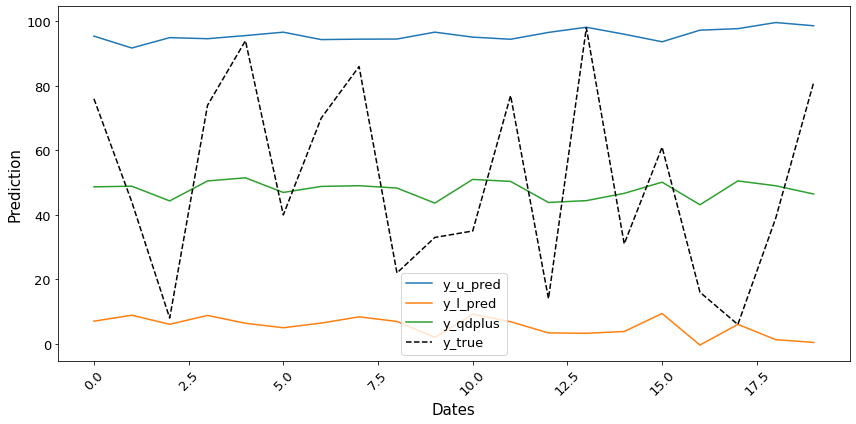

In [32]:
eval_plot_qdplus(y_pred_L_sub_lstm,y_pred_U_sub_lstm,v_lstm_qdplus,y_test_deep_scaler,scaler_y_test)

In [25]:
import numpy as np
import pandas as pd
data = {
    'y_pred_L_lstm_qdplus': y_pred_L_sub_lstm.flatten(),
    'y_pred_U_lstm_qdplus': y_pred_U_sub_lstm.flatten(),
    'v_lstm_qdplus': v_lstm_qdplus.flatten()
}

# 转换为DataFrame
df = pd.DataFrame(data)

# 保存为CSV文件
df.to_csv('./data/v_lstm_qdplus.csv', index=False)
